In [ ]:
import pandas as pd
import numpy as np
import sqlite3 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7) 

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
conn = sqlite3.connect('ecommerce.db')

query = "SELECT * FROM sales"

try:
    df = pd.read_sql_query(query, conn)
    print("Data loaded successfully from ecommerce.db!")
except Exception as e:
    print(f"Error loading data: {e}")
    
conn.close()

Data loaded successfully from ecommerce.db!


In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [ ]:
print("Missing Values BEFORE Cleaning:")
print(df.isnull().sum())
print("-"* 30)


df.dropna(subset=['Customer ID'] , inplace=True)

print("Missing Valures AFTER Clening Customer ID:")
print(df.isnull().sum())

Missing Values BEFORE Cleaning:
Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64
------------------------------
Missing Valures AFTER Clening Customer ID:
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print("Data Type AFTER Conversion:")

df.info()

Data Type AFTER Conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.6+ MB


In [ ]:
df['TotalPrice'] = df['Quantity'] * df['Price']

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [ ]:
print(f"จำนวนแถวก่อนกรองข้อมูลผิดปกติ: {len(df)}")

df = df[df['Quantity'] > 0]

df = df[df['Price'] > 0]

print(f"จำนวนแถวหลังกรองข้อมูลผิดปกติ: {len(df)}")

จำนวนแถวก่อนกรองข้อมูลผิดปกติ: 824364
จำนวนแถวหลังกรองข้อมูลผิดปกติ: 805549


In [ ]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index()

monthly_sales['InvoiceMonth'] = monthly_sales['InvoiceMonth'].dt.to_timestamp()

print("ข้อมูลยอดขายรายเดือน (5 แถวแรก):")
print(monthly_sales.head())

ข้อมูลยอดขายรายเดือน (5 แถวแรก):
  InvoiceMonth  TotalPrice
0   2009-12-01  686654.160
1   2010-01-01  557319.062
2   2010-02-01  506371.066
3   2010-03-01  699608.991
4   2010-04-01  594609.192


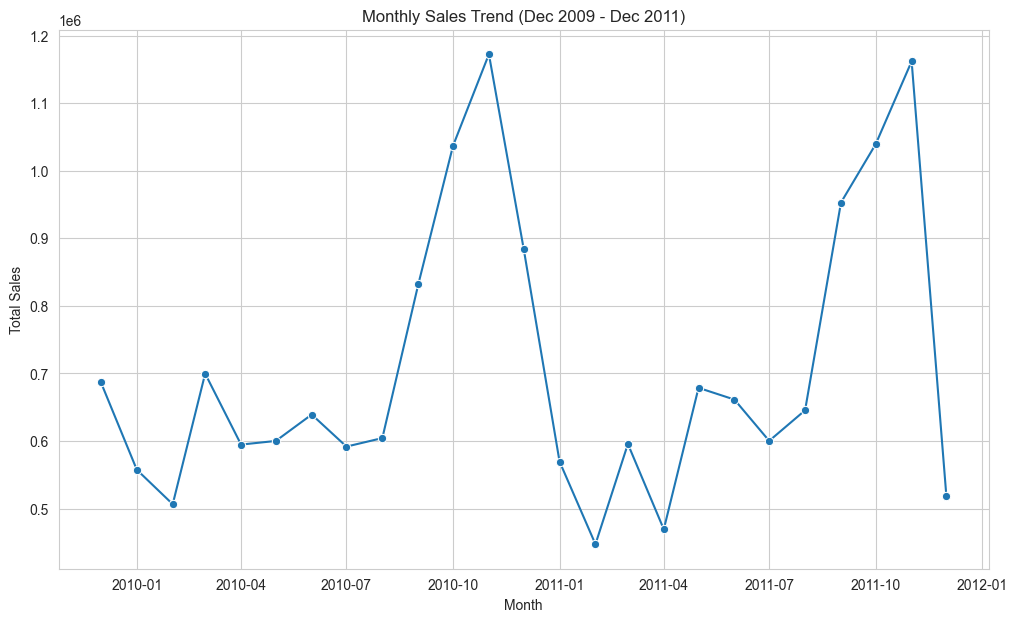

In [ ]:
sns.lineplot(data=monthly_sales, x='InvoiceMonth', y='TotalPrice', marker='o') 
plt.title('Monthly Sales Trend (Dec 2009 - Dec 2011)')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.show()

In [ ]:
top_10_products = df.groupby('Description')['Quantity'].sum().nlargest(10).reset_index()

print("10 อันดับสินค้าที่ขายดีที่สุด (ตามจำนวน):")
print(top_10_products)

10 อันดับสินค้าที่ขายดีที่สุด (ตามจำนวน):
                          Description  Quantity
0   WORLD WAR 2 GLIDERS ASSTD DESIGNS    109169
1  WHITE HANGING HEART T-LIGHT HOLDER     93640
2         PAPER CRAFT , LITTLE BIRDIE     80995
3       ASSORTED COLOUR BIRD ORNAMENT     79913
4      MEDIUM CERAMIC TOP STORAGE JAR     77916
5             JUMBO BAG RED RETROSPOT     75759
6                 BROCADE RING PURSE      71129
7  PACK OF 60 PINK PAISLEY CAKE CASES     55270
8         60 TEATIME FAIRY CAKE CASES     53495
9     PACK OF 72 RETROSPOT CAKE CASES     46107


C:\Users\kanth\AppData\Local\Temp\ipykernel_3044\3253528819.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_products, x='Quantity', y='Description', palette='viridis')


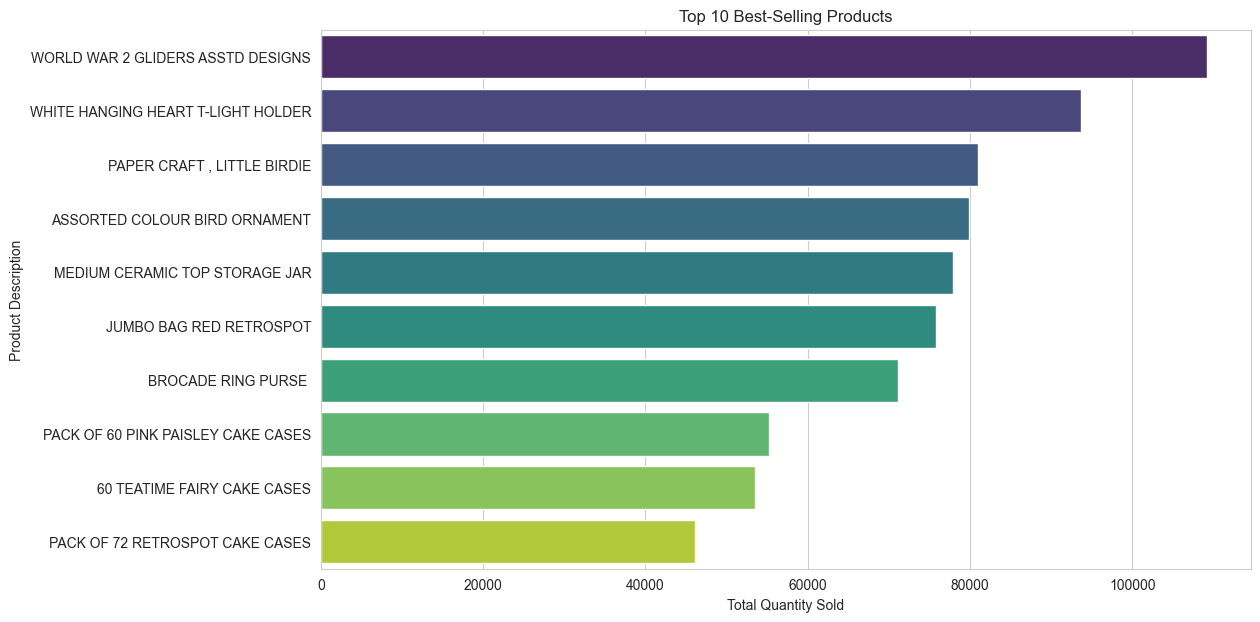

In [ ]:
sns.barplot(data=top_10_products, x='Quantity', y='Description', palette='viridis')

plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')

plt.show()

In [ ]:
top_10_countries = df.groupby('Country')['TotalPrice'].sum().nlargest(10).reset_index()

print("10 ประเทศที่มียอดสั่งซื้อสูงสุด:")
print(top_10_countries)

10 ประเทศที่มียอดสั่งซื้อสูงสุด:
          Country    TotalPrice
0  United Kingdom  1.472315e+07
1            EIRE  6.216311e+05
2     Netherlands  5.542323e+05
3         Germany  4.312625e+05
4          France  3.552575e+05
5       Australia  1.699681e+05
6           Spain  1.091785e+05
7     Switzerland  1.003653e+05
8          Sweden  9.154972e+04
9         Denmark  6.986219e+04


C:\Users\kanth\AppData\Local\Temp\ipykernel_3044\4267649408.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_countries, x='TotalPrice', y='Country', palette='Spectral')


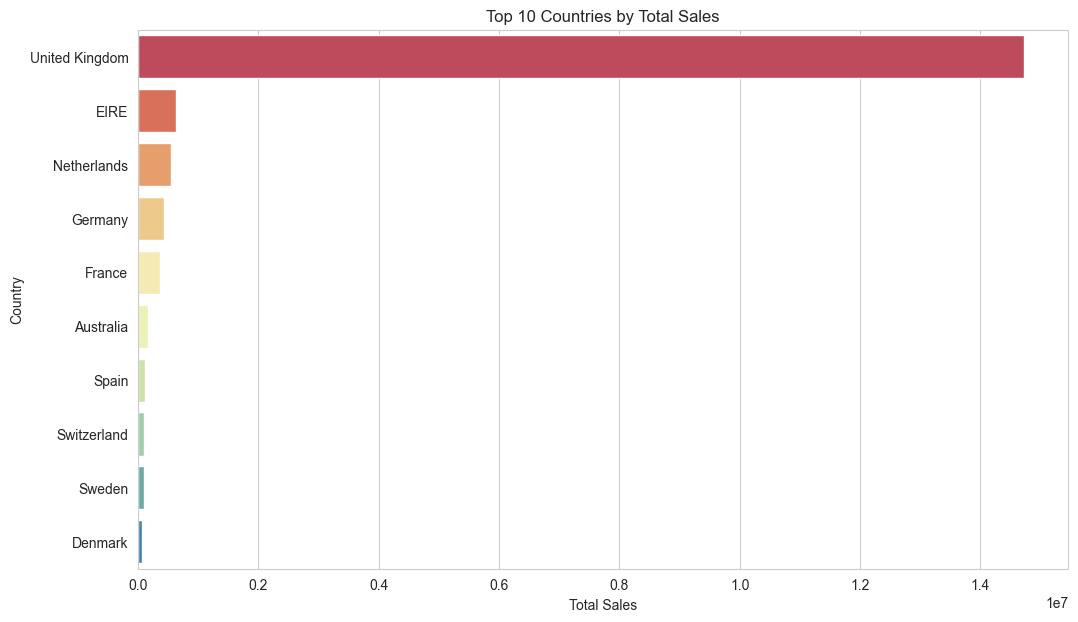

In [ ]:
sns.barplot(data=top_10_countries, x='TotalPrice', y='Country', palette='Spectral')

plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')

plt.show()

In [ ]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"Snapshot Date (วันอ้างอิง): {snapshot_date}")

rfm = df.groupby('Customer ID').agg(
    Recency=('InvoiceDate', lambda x: (snapshot_date - x.max()).days), 
    Frequency=('Invoice', 'nunique'),                                  
    Monetary=('TotalPrice', 'sum')                                     
).reset_index()

print("\nตาราง RFM (5 แถวแรก):")
print(rfm.head())

Snapshot Date (วันอ้างอิง): 2011-12-10 12:50:00

ตาราง RFM (5 แถวแรก):
   Customer ID  Recency  Frequency  Monetary
0      12346.0      326         12  77556.46
1      12347.0        2          8   5633.32
2      12348.0       75          5   2019.40
3      12349.0       19          4   4428.69
4      12350.0      310          1    334.40


In [ ]:
r_labels = range(4, 0, -1) 
f_labels = range(1, 5) 
m_labels = range(1, 5)

rfm['R_Score'] = pd.qcut(rfm['Recency'], q=4, labels=r_labels, duplicates='drop')

rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=4, labels=f_labels)

rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), q=4, labels=m_labels)

print(rfm.head())

   Customer ID  Recency  Frequency  Monetary R_Score F_Score M_Score
0      12346.0      326         12  77556.46       2       4       4
1      12347.0        2          8   5633.32       4       4       4
2      12348.0       75          5   2019.40       3       3       3
3      12349.0       19          4   4428.69       4       3       4
4      12350.0      310          1    334.40       2       1       1


In [ ]:
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

def assign_segment(rfm_score):
    if rfm_score in ['444', '434', '344', '443']: 
        return 'Champions (ลูกค้าชั้นดี)'
    elif rfm_score.startswith('4'): 
        return 'New Customers / Potential Loyalists'
    elif rfm_score.endswith('4'): 
        return 'Big Spenders'
    elif rfm_score[1] == '4': 
        return 'Loyal Customers'
    elif rfm_score.startswith('1'): 
        return 'At Risk / Need Attention'
    else:
        return 'Others' 

rfm['Segment'] = rfm['RFM_Score'].apply(assign_segment)

print(rfm.head())

   Customer ID  Recency  Frequency  Monetary R_Score F_Score M_Score  \
0      12346.0      326         12  77556.46       2       4       4   
1      12347.0        2          8   5633.32       4       4       4   
2      12348.0       75          5   2019.40       3       3       3   
3      12349.0       19          4   4428.69       4       3       4   
4      12350.0      310          1    334.40       2       1       1   

  RFM_Score                   Segment  
0       244              Big Spenders  
1       444  Champions (ลูกค้าชั้นดี)  
2       333                    Others  
3       434  Champions (ลูกค้าชั้นดี)  
4       211                    Others  


C:\Users\kanth\AppData\Local\Temp\ipykernel_3044\3004214313.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_counts, y='Segment', x='Count', palette='plasma')
c:\Users\kanth\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3621 (\N{THAI CHARACTER LO LING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kanth\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3641 (\N{THAI CHARACTER SARA UU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kanth\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_i

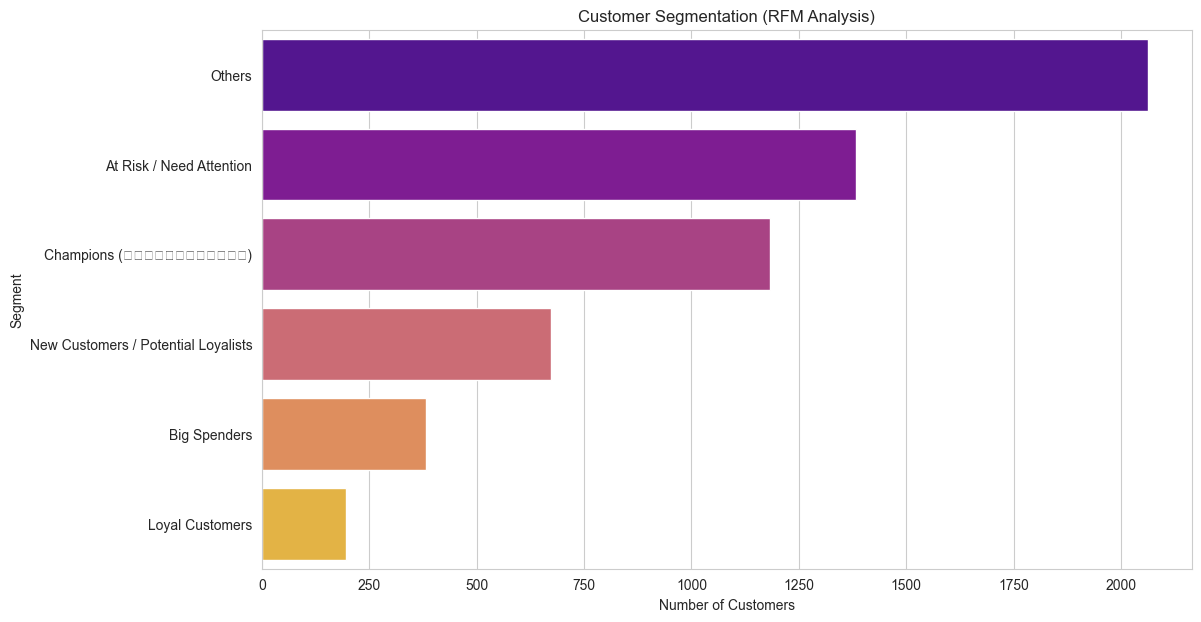

In [ ]:
segment_counts = rfm['Segment'].value_counts().reset_index(name='Count')

sns.barplot(data=segment_counts, y='Segment', x='Count', palette='plasma')

plt.title('Customer Segmentation (RFM Analysis)')
plt.xlabel('Number of Customers')
plt.ylabel('Segment')

plt.show()